In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
x = np.sqrt(2)
x

np.float64(1.4142135623730951)

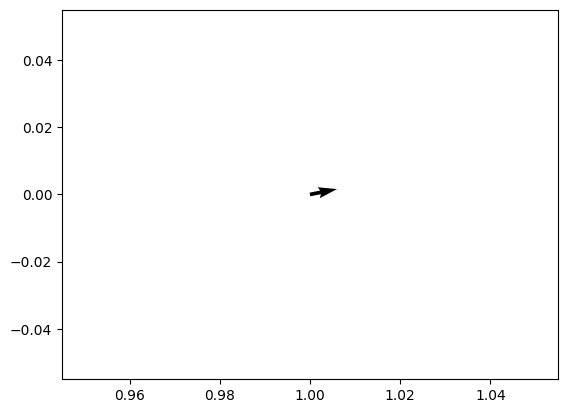

In [21]:
x = 1     # x-position of the vector
y = 0     # y-position of the vector                         
u = 5  # x-component of the direction of the vector  
v = 1    # y-component of the direction of the vector
plt.quiver(x, y, u, v)
plt.show()

[[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]]
[[-5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.]
 [-4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.]
 [-3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3.]
 [-2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.]
 [ 5.  5.  5

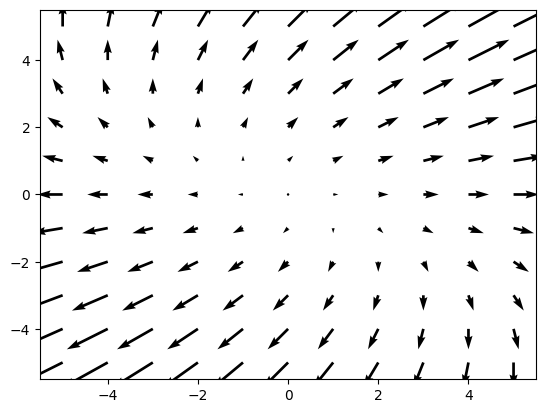

In [25]:
x = np.linspace(-5,5,11)
y = np.linspace(-5,5,11)
(x,y) = np.meshgrid(x,y)
print(x)
print(y)
u = x+y
v = y
plt.quiver(x, y, u, v)
plt.show()

In [4]:
xmin, xmax, ymin, ymax = -3, 3, -3, 3
n = 16

In [5]:
xgrid = np.linspace(xmin, xmax, n)
ygrid = np.linspace(ymin, ymax, n)
grid = np.array(np.meshgrid(xgrid, ygrid)).reshape(2, n**2)

"Untransformed unit basis vectors."
basis = np.array([[1, 0], [0, 1]])

In [6]:
def plot_quadrilateral(basis, color="k"):
    "Plot the quadrilateral defined by the given basis vectors."
    ix, iy = basis[0]
    jx, jy = basis[1]
    quad_x = [0, ix, ix + jx, jx, 0]
    quad_y = [0, iy, iy + jy, jy, 0]
    plt.plot(quad_x, quad_y, color)

In [8]:
def plot_vector(v, color="k", lw = 1):
    "Plot vector v as line with specified color and line width."
    plt.plot([0, v[0]], [0, v[1]], c=color, lw=lw)
    

In [9]:
def plot_points(grid, color="k", marker="."):
    "Plot the grid points in specified color and marker style."
    plt.scatter(*grid, c=color, s=2, marker=marker)


In [13]:
def apply_transformation(basis, T):
    "Apply linear transformation T to the basis vectors."
    return (T @ basis.T).T


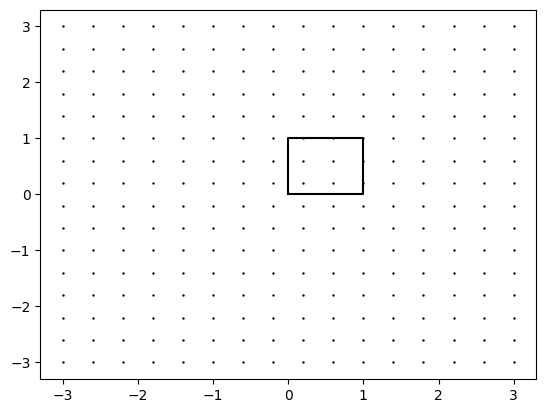

In [10]:
# The untransformed grid and unit square
plot_points(grid)
plot_quadrilateral(basis)


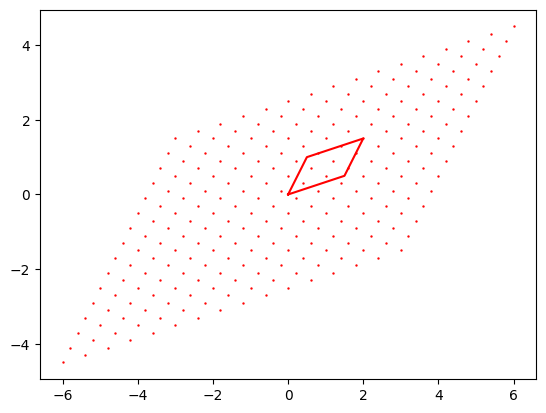

In [14]:
#Apply the linear transformation matrix to the scene
S = np.array([[1.5, 0.5], [0.5, 1]])
tbasis = apply_transformation(basis, S)
plot_quadrilateral(tbasis, color="r")
tgrid = S @ grid
plot_points(tgrid, color="r")



[1.80901699 0.69098301] [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


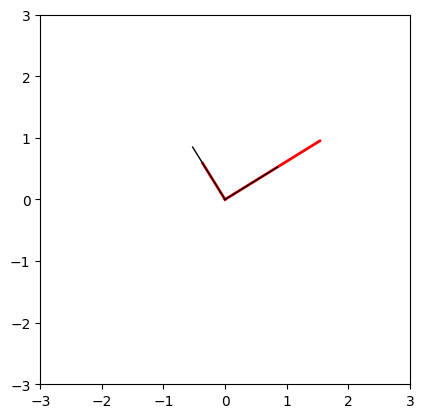

In [17]:
#Find the eigen values and eigen vectors of the transformation matrix
vals, vecs = np.linalg.eig(S)
print(vals, vecs)
if all(np.isreal(vals)):
    # if they are real indicate them on the diagram
     v1, v2 = vals
     e1, e2 = vecs.T
     plot_vector(e1 * v1, color="r", lw=2)
     plot_vector(e2 * v2, color="r", lw=2)
     plot_vector(e1,"k")
     plot_vector(e2,"k")

# Ensure the plot has 1:1 aspect ratio (i.e square looks square) and set the limits
plt.axis("square")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.show()


[1.80901699 0.69098301] [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


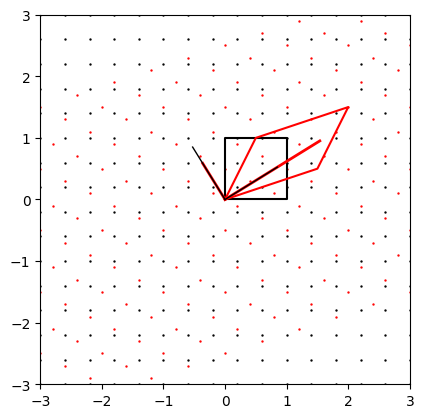

In [18]:
# The untransformed grid and unit square
plot_points(grid)
plot_quadrilateral(basis)

#Apply the linear transformation matrix to the scene
S = np.array([[1.5, 0.5], [0.5, 1]])
tbasis = apply_transformation(basis, S)
plot_quadrilateral(tbasis, color="r")
tgrid = S @ grid
plot_points(tgrid, color="r")

#Find the eigen values and eigen vectors of the transformation matrix
vals, vecs = np.linalg.eig(S)
print(vals, vecs)
if all(np.isreal(vals)):
    # if they are real indicate them on the diagram
     v1, v2 = vals
     e1, e2 = vecs.T
     plot_vector(e1 * v1, color="r", lw=2)
     plot_vector(e2 * v2, color="r", lw=2)
     plot_vector(e1,"k")
     plot_vector(e2,"k")

# Ensure the plot has 1:1 aspect ratio (i.e square looks square) and set the limits
plt.axis("square")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.show()
